## Lab 08
### Ilnaz Fazliakhmetov

## Assignment 1

In [133]:
import pandas as ps

data = ps.read_csv('ds-boot-2.csv', sep = '\t')
data.shape

(40, 34)

In [134]:
data.head()

,id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p24,p25,p26,p27,p28,y1,y2,y3,y4,y5
0,11,6.48148,3.0,5.0,7.75000,0.0,7.16667,8.16667,9.66667,6.16667,...,1.66667,3.16667,0.0,0.00000,0.0,1.0,5.00,7.44,1.18,4.38
1,12,5.74074,4.0,8.0,7.33333,8.0,8.83333,9.75000,9.66667,9.00000,...,2.50000,5.50000,5.0,8.66667,8.0,4.5,4.25,8.93,2.00,6.03
2,25,7.59259,7.0,8.0,7.66667,8.0,9.66667,9.50000,6.16667,9.66667,...,3.50000,3.50000,9.0,6.50000,7.0,7.5,11.00,8.97,2.00,9.12
3,31,5.96297,4.0,8.0,9.33333,10.0,9.33333,7.00000,8.50000,9.66667,...,0.00000,0.00000,0.0,0.00000,0.0,4.0,6.25,8.93,1.82,6.41
4,48,5.44444,1.0,3.5,6.41667,9.0,8.50000,7.08333,6.33333,9.00000,...,0.00000,0.00000,0.0,0.00000,0.0,0.0,3.00,8.08,1.36,3.67


### Bootstrap estimation

In [151]:
import numpy as np

# numder of bootstrap replications
B = 1000

orig_samples = data.iloc[:, 1:29]
target_labels = data.iloc[:, 29:]

def get_bootstrap_estimation(data, stat):
    '''stat - statistics under estimation'''
    n = len(data)
    data_b = np.random.choice(data, (B,n))
    stat_applied = np.apply_along_axis(stat, axis=1, arr=data_b)
    b_mean = np.mean(stat_applied)
    b_std = np.std(stat_applied)
    return b_mean, b_std
    

for label in target_labels:
    print label,'estimation:'
    print 'mean:'
    mean_est, mean_est_std = get_bootstrap_estimation(target_labels[label], np.mean)
    print("({} +/- 1.96 * {}) for 95% ci".format(mean_est, mean_est_std))
    print("median:")
    median_est, median_est_std = get_bootstrap_estimation(target_labels[label], np.median)
    print("({} +/- 1.96 * {}) for 95% ci\n".format(median_est, median_est_std))

y1 estimation:
mean:
(4.0335375 +/- 1.96 * 0.466651052548) for 95% ci
median:
(4.0185 +/- 1.96 * 0.558822646284) for 95% ci

y2 estimation:
mean:
(5.5377875 +/- 1.96 * 0.527005836513) for 95% ci
median:
(6.181 +/- 1.96 * 0.698562094591) for 95% ci

y3 estimation:
mean:
(7.292144 +/- 1.96 * 0.485396742252) for 95% ci
median:
(8.30589 +/- 1.96 * 0.273728346906) for 95% ci

y4 estimation:
mean:
(1.527505 +/- 1.96 * 0.10499431937) for 95% ci
median:
(1.86162 +/- 1.96 * 0.132657173195) for 95% ci

y5 estimation:
mean:
(5.63358875 +/- 1.96 * 0.461113277499) for 95% ci
median:
(6.17204 +/- 1.96 * 0.431253566246) for 95% ci



#### Linear Regression

In [137]:
from sklearn.linear_model import LinearRegression

def bootstrap_coeff(X,Y,B=1000):
    '''get bootstrapped coef estimation and 95% conf intervals'''
    n = X.shape[0]
    bootstrap_indices = np.random.choice(range(n), (B, n), replace=True)
    coeffs = []
    model = LinearRegression()
    for sample_index in bootstrap_indices:
        X_train = X.iloc[sample_index]
        Y_target = Y.iloc[sample_index]
        model.fit(X_train, Y_target)
        coeffs.append(np.append(model.coef_, model.intercept_))
    coeffs = np.array(coeffs)
    ci = np.percentile(coeffs, [2.5,97.5], axis=0)
    return coeffs.mean(axis=0), ci

# to prevent overfitting, only first 10 predictors were used
features = ['p%s' % i for i in range(1,10)]


for label in target_labels:
    coeffs, ci = bootstrap_coeff(data[features], data[label])
    print label
    print 'intercept:',coeffs[-1]
    print 'coef:', ci[:-1]
    print 'from', ci[0][:-1], '  ', ci[0][-1]
    print 'to  ', ci[1][:-1], '  ', ci[1][-1]
    print
    


y1
intercept: -0.303790481741
coef: [[-0.39875705 -0.01749444 -0.59131161 -0.35901957 -0.89340988 -1.10250158
  -0.32861924 -0.81064672 -0.20272052 -1.22991116]]
from [-0.39875705 -0.01749444 -0.59131161 -0.35901957 -0.89340988 -1.10250158
 -0.32861924 -0.81064672 -0.20272052]    -1.22991115573
to   [ 0.61184096  0.66560657  0.62921324  0.94545878  0.39507547  0.67167276
  1.04724289  0.07730203  0.69906036]    0.216045206737

y2
intercept: -0.495235584367
coef: [[-0.49193782 -0.28190916 -0.30136387 -0.39655616 -0.88367575 -0.81031776
  -0.33838344 -0.92270464 -0.23775864 -1.58949183]]
from [-0.49193782 -0.28190916 -0.30136387 -0.39655616 -0.88367575 -0.81031776
 -0.33838344 -0.92270464 -0.23775864]    -1.58949183424
to   [ 0.51189754  0.52365223  1.07704549  1.01653377  0.17029392  0.94893774
  1.03736091  0.20959829  0.68624939]    0.0599039355008

y3
intercept: 0.23639775414
coef: [[ 0.04018663 -0.04799105 -0.03920817 -0.15340635 -0.01084948 -0.21406995
  -0.01951144  0.11378324 -0.

## Assignment 2

In [68]:
data2 = ps.read_csv('ds-boot-1.csv', sep = '\t')

In [71]:
data2.head()

,day,bugsPerDay,cummBugs
0,1,0,0
1,2,1,1
2,3,0,1
3,4,2,3
4,5,1,4


In [72]:
data2.shape

(1327, 3)

('G-O S-shaped', array([  8.52279407e+03,   1.86479955e-03]), 106308246.59811872, False)


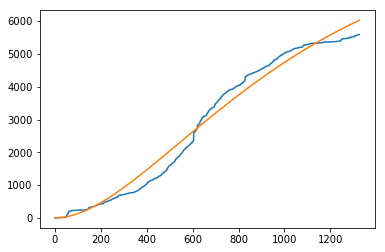

In [113]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

def g_o_s_shaped(a,b,t):
    '''Goel-Okumoto S-shaped model'''
    return a * (1-(1+b*t)*np.exp(-b*t))

def OLS(params):
    '''ordinary least squares objective func for Goel-Okumoto S-shaped model'''
    t = np.arange(data2['cummBugs'].size)
    a,b = params
    return ((data2['cummBugs'] - g_o_s_shaped(a,b,t))**2).sum()

#optimize parameters
gos_opt = minimize(OLS, [5800, 0.001], method='Nelder-Mead')
print('G-O S-shaped', gos_opt.x, gos_opt.fun, gos_opt.success)

x = np.arange(data2['cummBugs'].size)
xs = g_o_s_shaped(gos_opt.x[0], gos_opt.x[1], x)

plt.plot(data2['cummBugs'])
plt.plot(xs)
plt.show()



### Determining 95% confidence interval for parameters of fitting using Bootstrap

In [132]:
X = data2['bugsPerDay']
B = 1000
n = X.size

b_samples = np.random.choice(X, (B, n))

params = []

for b_sample in b_samples:
    cumm_sum = np.cumsum(b_sample)
    
    def obj_func(params):
        t = np.arange(len(cumm_sum))
        a,b = params
        return ((cumm_sum - g_o_s_shaped(a,b,t))**2).sum()
    
    gos_opt = minimize(obj_func, [5800, 0.001], method='Nelder-Mead')
    params.append(gos_opt.x)

param_est = np.array(params).mean(axis=0)
ci = np.percentile(params, [2.5,97.5], axis=0)

print '95% confidence interval for model params:'

for i in range(len(param_est)):
    print 'parameter est:',param_est[i],', conf interval: [',ci[0][i], '  ', ci[1][i],']'

95% confidence interval for model params:
parameter est: 6648.24655766 , conf interval: [ 5644.35255852    7985.47850725 ]
parameter est: 0.00226255222962 , conf interval: [ 0.00182314352095    0.00278781338637 ]
